In [1]:
import requests
from bs4 import BeautifulSoup as bs4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Taking Countries!

In [2]:
continents = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
print(continents)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of countries by continents - Simple English Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var c

In [3]:
continents_countries_soup = bs4(continents,"lxml")
continents = continents_countries_soup.find_all('h2' > 'span', {"class":"mw-headline"})
continents

[<span class="mw-headline" id="Africa">Africa</span>,
 <span class="mw-headline" id="Antarctica">Antarctica</span>,
 <span class="mw-headline" id="Asia">Asia</span>,
 <span class="mw-headline" id="Europe">Europe</span>,
 <span class="mw-headline" id="North_America">North America</span>,
 <span class="mw-headline" id="South_America">South America</span>,
 <span class="mw-headline" id="Oceania">Oceania</span>,
 <span class="mw-headline" id="References">References</span>,
 <span class="mw-headline" id="Other_websites">Other websites</span>]

In [4]:
target_continents = ['Africa',
                    'Asia',
                    'Europe',
                    'North and Central America',
                    'South America',
                    'Oceania']

In [5]:
ol_html = continents_countries_soup.find_all('ol')
all_countries = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]

In [6]:
countries_in_continents = []
for items in all_countries:
    countries = []
    if items:
        for country in items:
            countries = [country.find('a').text for country in items if country.find('a')]
        countries_in_continents.append(countries)

In [7]:
countries_continent_category_df = pd.DataFrame(
    zip(countries_in_continents, target_continents), columns=['Country', 'Continent']).explode('Country').reset_index(drop=True)
countries_continent_category_df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
201,Samoa,Oceania
202,Solomon Islands,Oceania
203,Tonga,Oceania
204,Tuvalu,Oceania


# Taking happiness

In [8]:
url = "https://en.wikipedia.org/wiki/World_Happiness_Report#2020_report"
response = requests.get(url)
soup = bs4(response.content, "html.parser")
tables = soup.find_all("table", class_="wikitable")
dataframes = []
for table in tables:
    df = pd.read_html(str(table))[0]
    dataframes.append(df)

In [9]:
year_2020 = dataframes[2]
year_2019 = dataframes[3]
year_2018 = dataframes[4]
year_2017 = dataframes[5]
year_2016 = dataframes[6]
year_2013 = dataframes[7]

In [10]:
year_2020["Year"] = 2020
year_2019["Year"] = 2019
year_2018["Year"] = 2018
year_2017["Year"] = 2017
year_2016["Year"] = 2016
year_2013["Year"] = 2013

In [11]:
countries_continent_category_df.head()

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [12]:
year_2020 = year_2020.rename({"Country or region":"Country"}, axis=1)
year_2020.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,2020
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,2020
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,2020
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,2020
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,2020


In [13]:
df = pd.merge(year_2020, countries_continent_category_df, how='inner', on='Country')
df.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Continent
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,2020,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,2020,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,2020,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,2020,Europe
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,2020,Europe


In [14]:
df.groupby("Continent").mean()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Continent,,,,,,,,,
Africa,121.717949,4.392077,0.492769,0.869077,0.408026,0.380692,0.185000,0.104564,2020.0
Asia,83.952381,5.282833,0.912452,1.171071,0.719595,0.481929,0.205619,0.124024,2020.0
Europe,45.785714,6.270024,1.157333,1.341262,0.887595,0.481476,0.169714,0.153167,2020.0
North and Central America,47.363636,6.114545,0.834000,1.234273,0.784727,0.543000,0.185909,0.124455,2020.0
Oceania,10.000000,7.261500,1.276000,1.482000,1.015500,0.634500,0.325500,0.398500,2020.0
South America,53.636364,5.962545,0.947273,1.319364,0.787182,0.508727,0.128818,0.072727,2020.0


<AxesSubplot:title={'center':'Correlation at 2020'}>

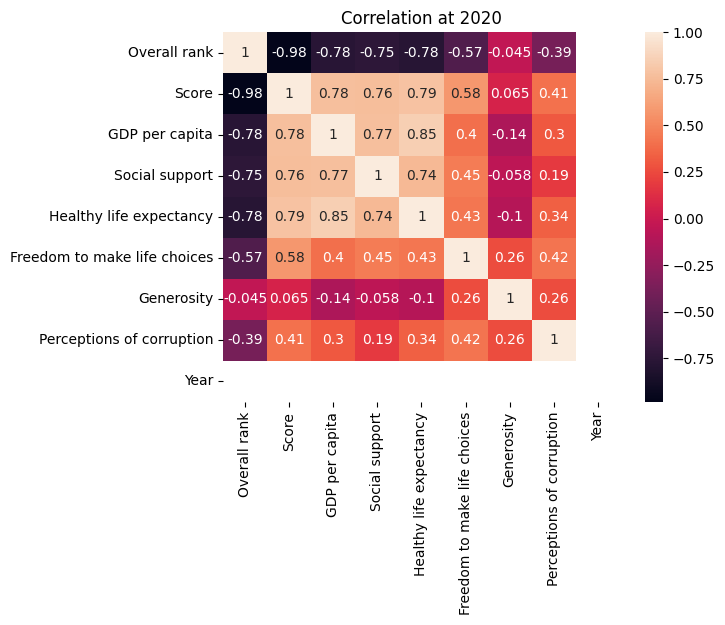

In [15]:
plt.title("Correlation at 2020")
corr = df.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:title={'center':'Correlation 2019'}>

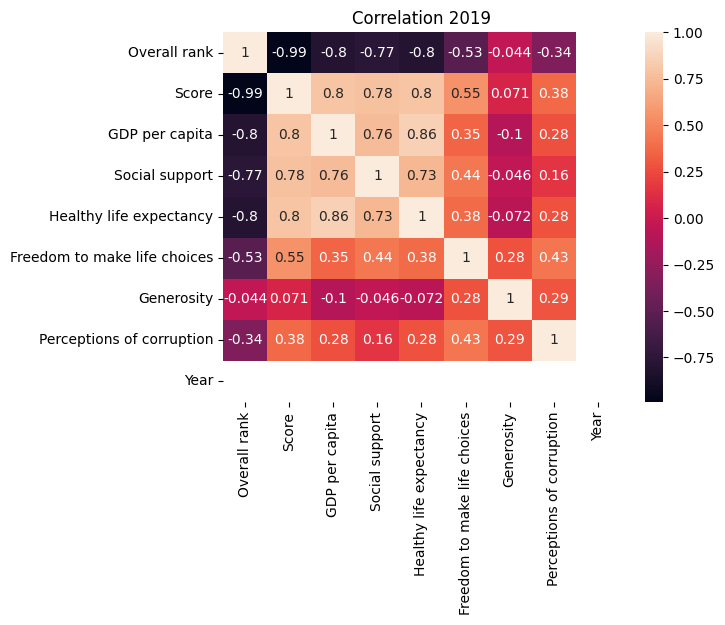

In [16]:
year_2019 = year_2019.rename({"Country or region":"Country"}, axis=1)
df = pd.merge(year_2019, countries_continent_category_df, how='inner', on='Country')
plt.title("Correlation 2019")
corr = df.corr()
sns.heatmap(corr, annot=True)

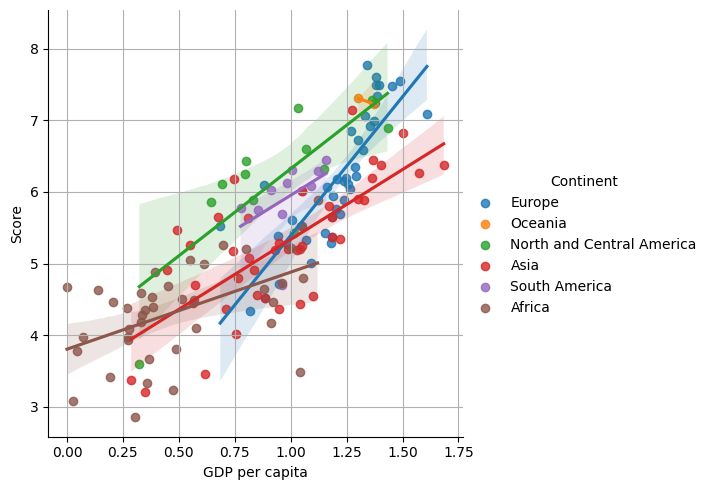

In [17]:
sns.lmplot(x='GDP per capita', y='Score', data=df, fit_reg=True, hue='Continent')
plt.grid()

<AxesSubplot:>

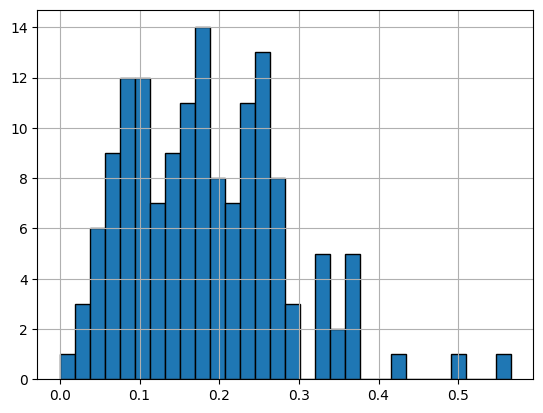

In [24]:
df["Generosity"].hist(bins=30, edgecolor="black")